In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stumpy

from data.dataset_utils import load_data

In [2]:
df = load_data(filtered=True)

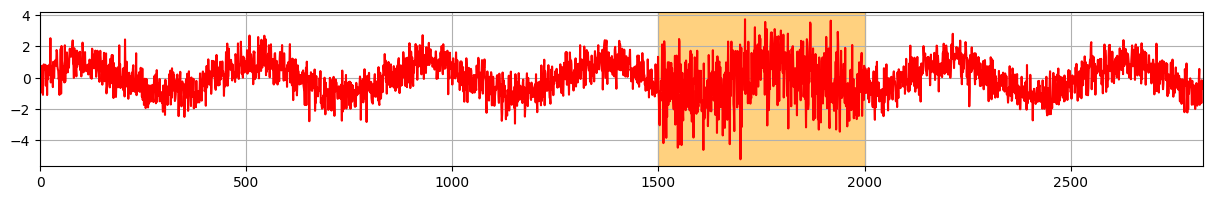

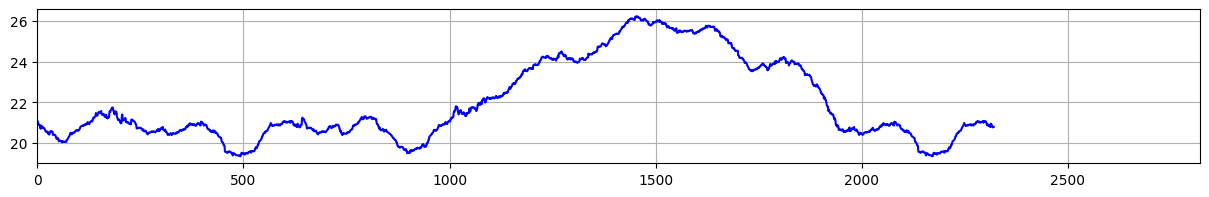

In [ ]:
sin = np.sin(np.linspace(0, 42, 2820)) + np.random.normal(0, 0.7, 2820)

# add anomaly
anomaly_start = 1500
anomaly_end = 2000
additional_noise = np.random.normal(0, 1.4, anomaly_end - anomaly_start)
sin[anomaly_start:anomaly_end] += additional_noise

# compute matrix profile
m = 500
mp = stumpy.stump(sin, m)[:, 0]

# plot time series in red
plt.figure(figsize=(15, 2))
plt.plot(sin, color='red')
plt.axvspan(anomaly_start, anomaly_end, color='orange', alpha=0.5)
plt.xlim(0, 2820)
plt.grid()
plt.show()

# plot matrix profile in blue
plt.figure(figsize=(15, 2))
plt.plot(mp, color='blue')
plt.xlim(0, 2820)
plt.grid()
plt.show()


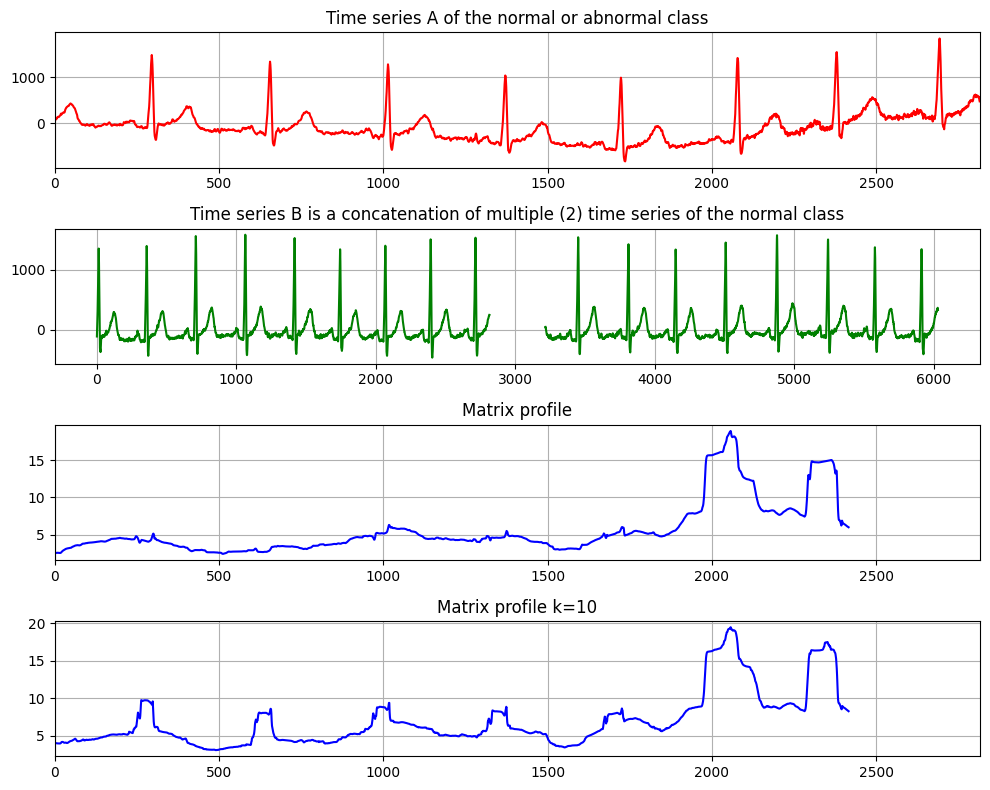

In [ ]:
# matrix profile example for A-B-join
m = 400
t_a = df[df['class_id'] == 4].reset_index(drop=True)['bio_signals'][0]['ecg']

# t_b is a concatenation of two time series of the normal class
t_b = np.concatenate([df[df['class_id'] == 0].reset_index(drop=True)['bio_signals'][0]['ecg'], np.full(400, np.nan), df[df['class_id'] == 0].reset_index(drop=True)['bio_signals'][1]['ecg']])

mp_ab = stumpy.stump(T_A=t_a, T_B = t_b, ignore_trivial=False, m=m, k=10)
mp_ab_1 = mp_ab[:, 0]
mp_ab_2 = mp_ab[:, 9]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8))

# plot time series A in red
ax1.plot(t_a, color='red')
ax1.set_xlim(0, len(t_a))
ax1.set_title('Time series A of the normal or abnormal class')
ax1.grid()

# plot time series B in green
ax2.plot(t_b, color='green')
ax2.set_title('Time series B is a concatenation of multiple (2) time series of the normal class')
ax2.grid()

# plot matrix profile k=1 in blue
ax3.plot(mp_ab_1, color='blue')
ax3.set_xlim(0, len(t_a))
ax3.set_title('Matrix profile')
ax3.grid()

# plot matrix profile k=10 in blue
ax4.plot(mp_ab_2, color='blue')
ax4.set_xlim(0, len(t_a))
ax4.set_title('Matrix profile k=10')
ax4.grid()

fig.tight_layout()
plt.show()

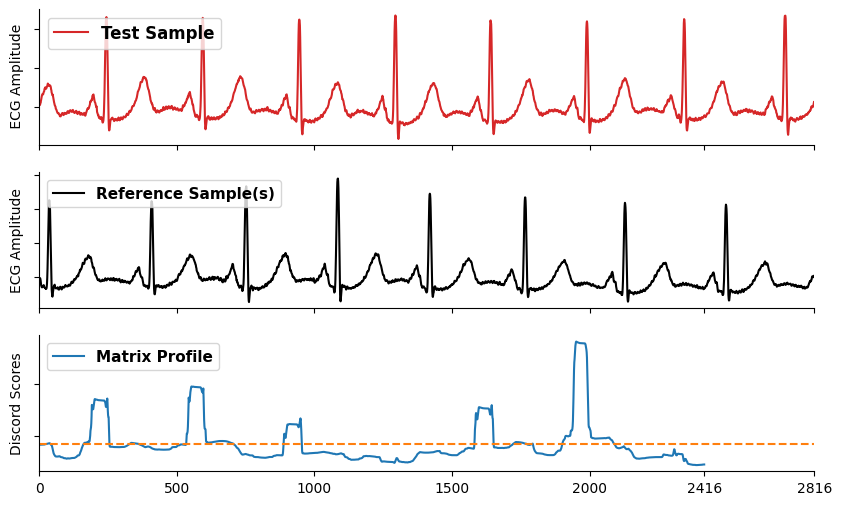

In [ ]:
# matrix profile example for A-B-join
m = 400
t_a = df[(df['sample_name'] == '101209_w_61-BL1-082')].iloc[0]['bio_signals']['ecg']

# t_b is a concatenation of two time series with 400 zeros in between
t_b = df[(df['sample_name'] == '101209_w_61-PA4-018')].iloc[0]['bio_signals']['ecg']

mp_ab = stumpy.stump(T_A=t_a, T_B=t_b, ignore_trivial=False, m=m)
mp_ab_1 = mp_ab[:, 0]
percentile_70 = np.percentile(mp_ab_1, 70)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 6))

# plot time series A in red
ax1.plot(t_a, color='tab:red', label='Test Sample')
ax1.set_xlim(0, len(t_a))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(loc='upper left', prop={'weight': 'bold', 'size': 12})
ax1.set_ylabel(' ECG Amplitude')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([0, 500, 1000, 1500, 2000, 2416, 2816])

# plot time series B in green
ax2.plot(t_b, color='black', label='Reference Sample(s)')
ax2.set_xlim(0, len(t_a))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc='upper left', prop={'weight': 'bold', 'size': 11})
ax2.set_ylabel('ECG Amplitude')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xticks([0, 500, 1000, 1500, 2000, 2416, 2816])

# plot matrix profile k=1 in blue
ax3.plot(mp_ab_1, color='tab:blue', label='Matrix Profile')
ax3.set_xlim(0, len(t_a))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.legend(loc='upper left', prop={'weight': 'bold', 'size': 11})
ax3.set_ylabel('Discord Scores')
ax3.set_yticklabels([])
ax3.set_xticks([0, 500, 1000, 1500, 2000, 2416, 2816])
ax3.axhline(y=percentile_70, color='tab:orange', linestyle='--')
ax3.legend(loc='upper left', prop={'weight': 'bold', 'size': 11})

plt.show()

In [6]:
m = 400
test_sample = df[df['class_id'] == 4].reset_index(drop=True)['bio_signals'][3]

# z-normalized matrix profile for each individual signal
mp_gsr = stumpy.stump(test_sample['gsr'], m=m)
mp_ecg = stumpy.stump(test_sample['ecg'], m=m)
mp_emg = stumpy.stump(test_sample['emg_trapezius'], m=m)

# multi-dimensional z-normalized matrix profile
mmp_motifs = stumpy.mstump(test_sample, m=m)
mmp_discords = stumpy.mstump(test_sample, m=m, discords=True)

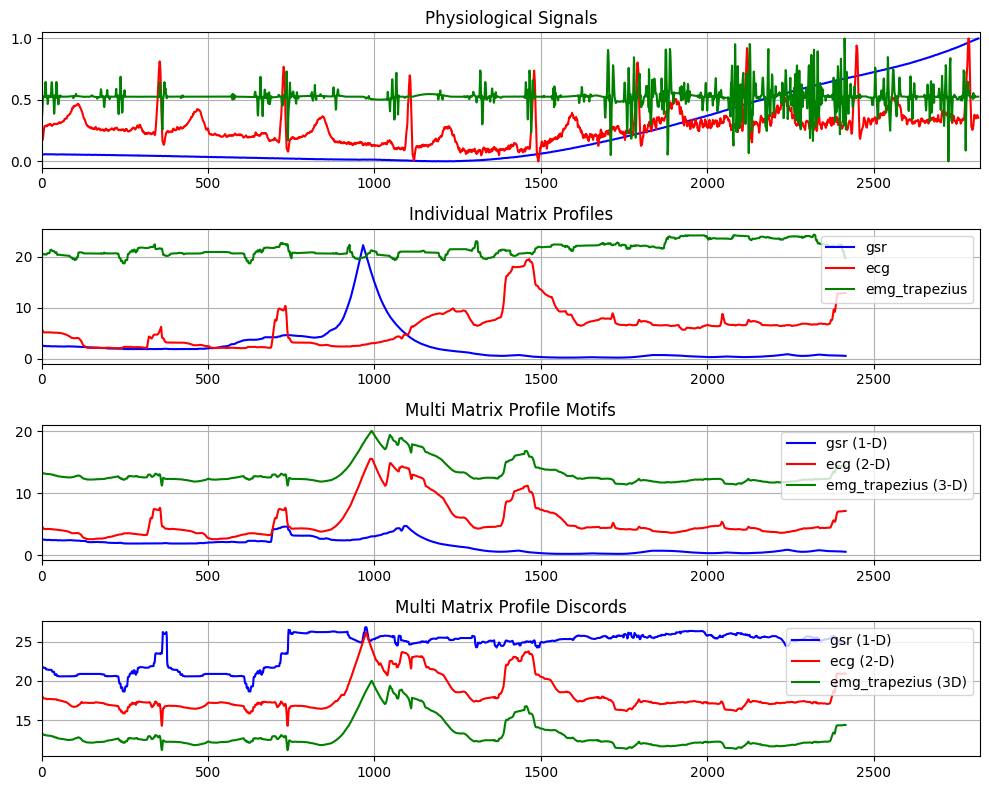

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8))

# Normalize to fit in the same plot
gsr = (test_sample['gsr'] - np.min(test_sample['gsr'])) / (np.max(test_sample['gsr']) - np.min(test_sample['gsr']))
ecg = (test_sample['ecg'] - np.min(test_sample['ecg'])) / (np.max(test_sample['ecg']) - np.min(test_sample['ecg']))
emg_trapezius = (test_sample['emg_trapezius'] - np.min(test_sample['emg_trapezius'])) / (np.max(test_sample['emg_trapezius']) - np.min(test_sample['emg_trapezius']))

# Plot the normalized original data
ax1.plot(gsr, label='gsr', color='blue')
ax1.plot(ecg, label='ecg', color='red')
ax1.plot(emg_trapezius, label='emg_trapezius', color='green')
ax1.set_title('Physiological Signals')
ax1.set_xlim(0, 2820)
ax1.grid(True)

# plot the matrix profile for each signal
ax2.plot(mp_gsr[:, 0], label='gsr', color='blue')
ax2.plot(mp_ecg[:, 0], label='ecg', color='red')
ax2.plot(mp_emg[:, 0], label='emg_trapezius', color='green')
ax2.set_title('Individual Matrix Profiles')
ax2.set_xlim(0, 2820)
ax2.grid(True)
ax2.legend(loc='upper right')

# plot the multi-dimensional matrix profile for motifs
ax3.plot(mmp_motifs[0][0], label='gsr (1-D)', color='blue')
ax3.plot(mmp_motifs[0][1], label='ecg (2-D)', color='red')
ax3.plot(mmp_motifs[0][2], label='emg_trapezius (3-D)', color='green')
ax3.set_title('Multi Matrix Profile Motifs')
ax3.set_xlim(0, 2820)
ax3.grid(True)
ax3.legend(loc='upper right')

# plot the multi-dimensional matrix profile for discords
ax4.plot(mmp_discords[0][0], label='gsr (1-D)', color='blue')
ax4.plot(mmp_discords[0][1], label='ecg (2-D)', color='red')
ax4.plot(mmp_discords[0][2], label='emg_trapezius (3D)', color='green')
ax4.set_title('Multi Matrix Profile Discords')
ax4.set_xlim(0, 2820)
ax4.grid(True)
ax4.legend(loc='upper right')

fig.tight_layout()
plt.show()